In [31]:
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 16

# 1.A : Model

Canva

# 1.B : Jumps (Ryu (data + fitted) + 3 trajectories (Ryu + mu2 + theta2))

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import gamma


def proba_gamma(mu: float, theta: float, L: float) -> float:
    alpha_gamma = mu**2 / theta**2
    beta_gamma = theta**2 / mu
    return gamma.pdf(L, a=alpha_gamma, scale=beta_gamma)


# Données expérimentales
x = np.arange(0, 150, 10)
y = np.array([10, 140, 240, 200, 130, 125, 90, 60, 30, 25, 20, 10, 15, 7, 5], dtype=float)
y /= np.sum(y)  # normalisation à 1

# PDF théorique
x_fine = np.arange(0, 150, 1)

# Fit
popt, pcov = curve_fit(
    lambda x, mu, theta: proba_gamma(mu, theta, x) * 10,
    x,
    y,
    p0=[30, 15],
    bounds=(0, np.inf),
    maxfev=10000
)

mu, theta = popt

# PDF continue
p = proba_gamma(mu, theta, x_fine)

# Normalisation correcte
p /= np.sum(p)

# Passage en probabilité par bin
bin_width = 10
p_plot = p * bin_width

# Plot
plt.figure(figsize=(8,6), dpi=1200)

plt.bar(x, y, width=8, edgecolor="black",
        color="red", alpha=0.5, label="Data from Ryu et al. 2022\nExtracted from Figure 3.B")

plt.plot(x_fine, p_plot, lw=2, color="red",
         label=f"Gamma fit (μ={mu:.0f}nm, θ={theta:.0f}nm)")

plt.xlabel("Step size (nm)")
plt.ylabel("Probability")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


# 1.C : Properties of the Gamma distrib

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from nucleo.simulation.probabilities import proba_gamma

plt.rcParams["font.size"] = 14

# Données expérimentales
x = np.arange(0, 150, 10)
y = np.array([10, 140, 240, 200, 130, 125, 90, 60, 30, 25, 20, 10, 15, 7, 5], dtype=float)
y /= np.sum(y)  # normalisation à 1

# PDF théorique
x_fine = np.arange(0, 150, 1)
mu1 = 50
theta1 = 20
p_a = proba_gamma(mu=mu1, theta=theta1, L=x_fine)
p_a /= np.sum(p)  # normalisation à 1

mu2 = 20
theta2 = 10
p_b = proba_gamma(mu=mu1, theta=theta2, L=x_fine)
p_b /= np.sum(p)  # normalisation à 1
p_c = proba_gamma(mu=mu2, theta=theta1, L=x_fine)
p_c /= np.sum(p)  # normalisation à 1

# -------------------------------
# Plot unique
# -------------------------------
plt.figure(figsize=(8,6), dpi=1200)

# PDF théorique
plt.plot(x_fine, p_a*10, lw=2, color="red", label=f"PDF Gamma (μ={mu1}, θ={theta1})")
plt.plot(x_fine, p_b*10, lw=2, color="green", label=f"PDF Gamma (μ={mu1}, θ={theta2})")
plt.plot(x_fine, p_c*10, lw=2, color="orange", label=f"PDF Gamma (μ={mu2}, θ={theta1})")


plt.xlabel(r"Step size $(\sigma)$")
plt.ylabel(r"Probability")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# 1.D : Chromatin lanscapes (homogeneous + periodic + random)

In [40]:
from nucleo.simulation.chromatin import alpha_random, alpha_periodic, alpha_homogeneous
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["font.size"] = 14

# Values in nm
s = 150
l = 10
alphao = 0
alphaf = 1
Lmin = 0
Lmax = 500
bps = 1

# Landscapes
obs_1 = alpha_homogeneous(s=s, l=l, alphao=alphao, alphaf=alphaf, Lmin=0, Lmax=Lmax, bps=bps)
obs_2 = alpha_periodic(s=s, l=l, alphao=alphao, alphaf=alphaf, Lmin=0, Lmax=Lmax, bps=bps)
obs_3 = alpha_random(s=s, l=l, alphao=alphao, alphaf=alphaf, Lmin=0, Lmax=Lmax, bps=bps)
x = np.arange(0, len(obs_1), 1)

# -------------------------------
# Homogeneous
# -------------------------------
plt.figure(figsize=(8,5), dpi=1200)

plt.plot(x, obs_1, c="b", lw=3)
plt.title("Homogeneous")
plt.xlabel("x")
plt.ylabel(r"Accessibility $\alpha$")
plt.ylim([-0.1, 1.1])
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# -------------------------------
# Periodic
# -------------------------------
plt.figure(figsize=(8,5), dpi=1200)

plt.step(x, obs_2, c="b", lw=3)
plt.title("Periodic")
plt.xlabel("x")
# plt.ylabel(r"Accessibility $\alpha$")
plt.ylim([-0.1, 1.1])
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# -------------------------------
# Random
# -------------------------------
plt.figure(figsize=(8,5), dpi=1200)

plt.step(x, obs_3, c="b", lw=3)
plt.title("Random")
plt.xlabel("x")
# plt.ylabel(r"Accessibility $\alpha$")
plt.ylim([-0.1, 1.1])
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# 1.D : Linker and RoadBlocks distribution

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

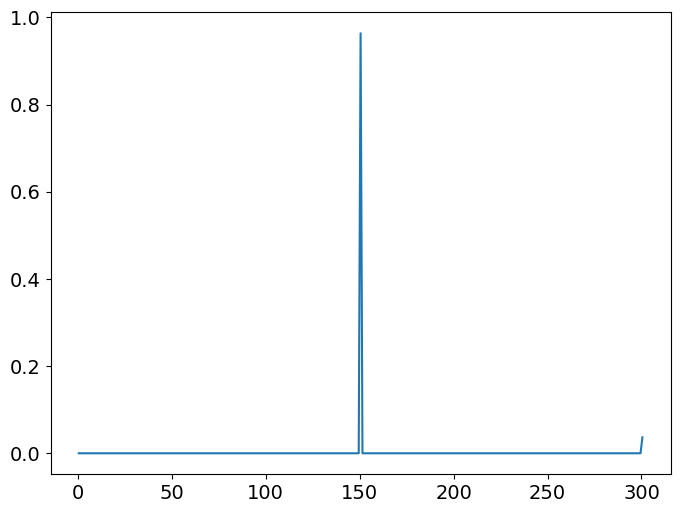

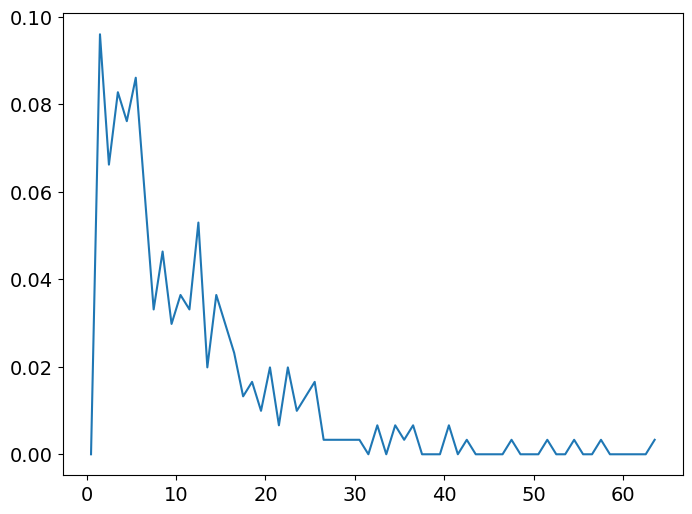

In [ ]:
# Librairies
import numpy as np
import matplotlib.pyplot as plt
import polars as pl
from pathlib import Path
from nucleo.io.plots import plot_obs_linker_distrib

root = Path("/home/nicolas/Documents/Workspace/nucleo/outputs/2026-02-23__PC/nucleo__fig_0")
paths = [str(p) for p in root.rglob("*.parquet")]
df_sorted = (
    pl.scan_parquet(paths)
    # .select(cs.numeric() | cs.boolean() | cs.string() | pl.col("t_matrix") | pl.col("x_matrix"))
    .collect()
    .sort(by=["landscape", "bpmin", "l", "alphad"],
          descending=[False, False, False, False]
        )
)
# print(df_sorted)


obs_points = df_sorted["obs_points"][0].to_numpy()
obs_distrib = df_sorted["obs_distrib"][0].to_numpy()
link_points = df_sorted["link_points"][0].to_numpy()
link_distrib = df_sorted["link_distrib"][0].to_numpy()
print(obs_distrib)


plt.figure(figsize=(8,6))
plt.plot(link_points, link_distrib)
plt.show()

plt.figure(figsize=(8,6))
plt.plot(obs_points, obs_distrib)
plt.show()

# .